In [1]:
# import the required libraries

import os
import pandas as pd 
import numpy as np 
import matplotlib.pylab as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import normalize
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, recall_score, precision_score, accuracy_score, f1_score

os.environ["KERAS_BACKEND"] = "tensorflow"
import tensorflow
import keras

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Using TensorFlow backend.


In [2]:
# set working directory

os.chdir('C:/Users/Pavan/Desktop/Propensity to Default')

In [3]:
# import the dataset

df = pd.read_csv('LoanStats.csv', low_memory=False)

In [4]:
# Analyse data

type(df)
df.size
df.shape
df.head()
df.tail()

pandas.core.frame.DataFrame

5450682

(39786, 137)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,loan_status
0,NaN,NaN,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fully Paid
1,NaN,NaN,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Charged Off
2,NaN,NaN,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fully Paid
3,NaN,NaN,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fully Paid
4,NaN,NaN,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fully Paid


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,loan_status
39781,NaN,NaN,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fully Paid
39782,NaN,NaN,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fully Paid
39783,NaN,NaN,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fully Paid
39784,NaN,NaN,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fully Paid
39785,NaN,NaN,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fully Paid


In [5]:
# list columns with more than 60% null values

check_null = df.isnull().sum().sort_values(ascending=False)/float(len(df))
check_null[check_null>0.6]
len(check_null[check_null>0.6])

all_util                                      1.000000
mo_sin_rcnt_rev_tl_op                         1.000000
total_cu_tl                                   1.000000
inq_last_12m                                  1.000000
acc_open_past_24mths                          1.000000
avg_cur_bal                                   1.000000
bc_open_to_buy                                1.000000
bc_util                                       1.000000
mo_sin_old_il_acct                            1.000000
mo_sin_old_rev_tl_op                          1.000000
mo_sin_rcnt_tl                                1.000000
total_rev_hi_lim                              1.000000
mort_acc                                      1.000000
mths_since_recent_bc                          1.000000
mths_since_recent_bc_dlq                      1.000000
mths_since_recent_inq                         1.000000
mths_since_recent_revol_delinq                1.000000
num_accts_ever_120_pd                         1.000000
num_actv_b

85

In [6]:
# remove all columns with more than 60% null values
# remove rows with all null values

df.drop(check_null[check_null>0.6].index, axis=1, inplace=True) 
df.dropna(axis=0, thresh=30, inplace=True)

In [7]:
#list number of unique values in each column (including NaN)

uniques_df = df.apply(lambda x: x.nunique(dropna=False))
uniques_df

loan_amnt                       885
funded_amnt                    1042
funded_amnt_inv                8215
term                              2
int_rate                        371
installment                   15405
grade                             7
sub_grade                        35
emp_title                     28864
emp_length                       12
home_ownership                    5
annual_inc                     5323
verification_status               3
issue_d                          55
pymnt_plan                        1
desc                          26571
purpose                          14
title                         19635
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                         40
pub_rec                           5
revol_bal                     21738
revol_util                  

In [8]:
# delete the columns that have only one value
# delete 'desc' as the description is not required

del_df = ['pymnt_plan','initial_list_status','out_prncp','out_prncp_inv','policy_code','application_type','acc_now_delinq','delinq_amnt','hardship_flag','desc']
df.drop(del_df, axis=1, inplace=True) 

In [9]:
# import libraries required for modelling and visualisation

import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import tree

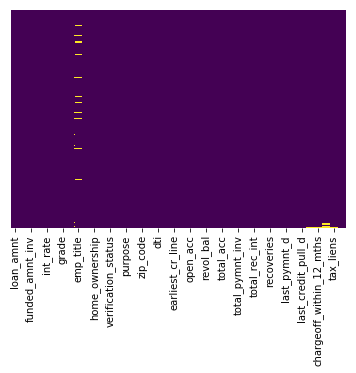

In [10]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
df.drop(['emp_title', 'title', 'last_credit_pull_d', 'chargeoff_within_12_mths', 'tax_liens'], axis=1, inplace=True) 

In [12]:
# check for variables with missing values

df.isnull().sum()

loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
term                            0
int_rate                        0
installment                     0
grade                           0
sub_grade                       0
emp_length                      0
home_ownership                  0
annual_inc                      0
verification_status             0
issue_d                         0
purpose                         0
zip_code                        0
addr_state                      0
dti                             0
delinq_2yrs                     0
earliest_cr_line                0
inq_last_6mths                  0
open_acc                        0
pub_rec                         0
revol_bal                       0
revol_util                     50
total_acc                       0
total_pymnt                     0
total_pymnt_inv                 0
total_rec_prncp                 0
total_rec_int                   0
total_rec_late

In [13]:
df.dropna(axis=0, how='any', inplace=True)
df.shape

(38970, 37)

In [14]:
# remove the word 'months' from 'term' and convert to float

df['term'] = df['term'].str.split(' ').str[1]
df['term'] = df.term.astype(float)

In [15]:
#interest rate is a string. Remove % and convert to float

df['int_rate'] = df['int_rate'].str.split('%').str[0]
df['int_rate'] = df.int_rate.astype(float)/100

In [16]:
# extract numbers from emp_length and fill missing values with the median

df['emp_length'] = df['emp_length'].str.extract('(\d+)').astype(float)

In [17]:
df.groupby('loan_status').size()

loan_status
Charged Off     5468
Fully Paid     33502
dtype: int64

In [18]:
df['loan_status'] = df['loan_status'].map( {'Fully Paid': 0,'Charged Off': 1}).astype(int)

In [19]:
df.drop(['sub_grade','issue_d','zip_code','addr_state','earliest_cr_line','last_pymnt_d'],axis=1,inplace=True)

In [20]:
df.groupby('verification_status').size()

verification_status
Not Verified       16164
Source Verified     9992
Verified           12814
dtype: int64

In [21]:
df['verification_status'] = df['verification_status'].map({'Not Verified': 'NotVerified','Source Verified': 'SourceVerified','Verified': 'Verified'})

In [22]:
df['revol_util'] = df['revol_util'].str.split('%').str[0]
df['revol_util'] = df.revol_util.astype(float)/100

In [23]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38970 entries, 0 to 39692
Data columns (total 31 columns):
loan_amnt                     38970 non-null int64
funded_amnt                   38970 non-null int64
funded_amnt_inv               38970 non-null float64
term                          38970 non-null float64
int_rate                      38970 non-null float64
installment                   38970 non-null float64
grade                         38970 non-null object
emp_length                    37900 non-null float64
home_ownership                38970 non-null object
annual_inc                    38970 non-null float64
verification_status           38970 non-null object
purpose                       38970 non-null object
dti                           38970 non-null float64
delinq_2yrs                   38970 non-null int64
inq_last_6mths                38970 non-null int64
open_acc                      38970 non-null int64
pub_rec                       38970 non-null int64
revol_

loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
emp_length                    1070
home_ownership                   0
annual_inc                       0
verification_status              0
purpose                          0
dti                              0
delinq_2yrs                      0
inq_last_6mths                   0
open_acc                         0
pub_rec                          0
revol_bal                        0
revol_util                       0
total_acc                        0
total_pymnt                      0
total_pymnt_inv                  0
total_rec_prncp                  0
total_rec_int                    0
total_rec_late_fee               0
recoveries                       0
collection_recovery_fee          0
last_pymnt_amnt                  0
collections_12_mths_

In [24]:
df.dropna(axis=0, how='any', inplace=True)
df.shape

(37900, 31)

In [25]:
# create dummy variables for the categorical variables

grade = pd.get_dummies(df['grade'], drop_first=True, prefix='grade')
home_ownership = pd.get_dummies(df['home_ownership'], drop_first=True, prefix='home_ownership')
ver_status = pd.get_dummies(df['verification_status'], drop_first=True, prefix='verification_status')
purpose = pd.get_dummies(df['purpose'], drop_first=True, prefix = 'purpose')

In [26]:
df.drop(['grade','home_ownership','verification_status','purpose'], axis=1, inplace=True)
df = pd.concat([df, grade, home_ownership, ver_status, purpose], axis=1)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37900 entries, 0 to 39692
Data columns (total 51 columns):
loan_amnt                             37900 non-null int64
funded_amnt                           37900 non-null int64
funded_amnt_inv                       37900 non-null float64
term                                  37900 non-null float64
int_rate                              37900 non-null float64
installment                           37900 non-null float64
emp_length                            37900 non-null float64
annual_inc                            37900 non-null float64
dti                                   37900 non-null float64
delinq_2yrs                           37900 non-null int64
inq_last_6mths                        37900 non-null int64
open_acc                              37900 non-null int64
pub_rec                               37900 non-null int64
revol_bal                             37900 non-null int64
revol_util                            37900 non-nul

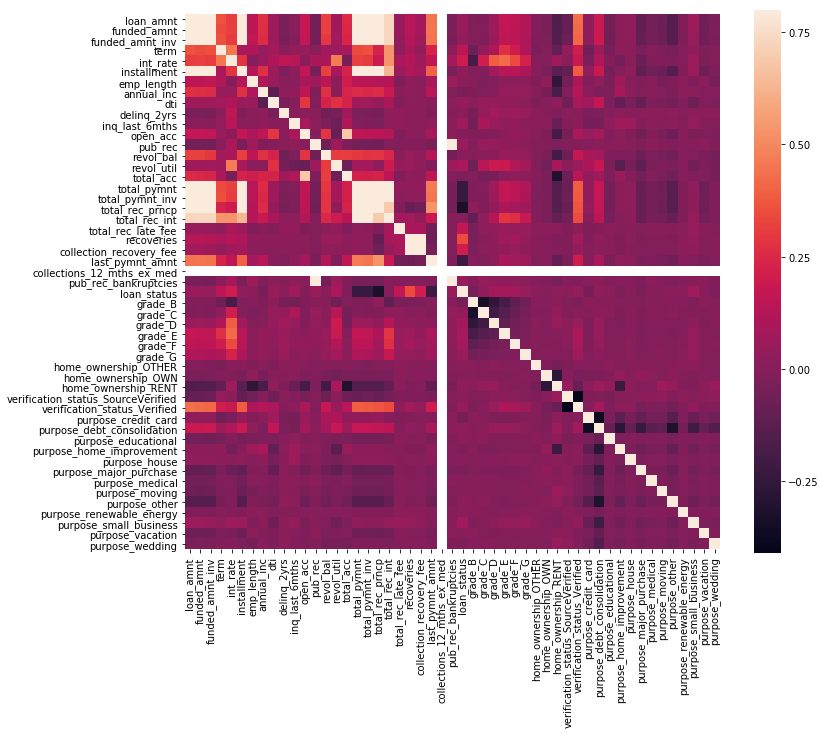

In [28]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat, vmax = 0.8, square=True);

In [29]:
# Identify important features

df_temp = df
y_temp = df_temp['loan_status']
df_temp = df_temp.drop(['loan_status'], axis=1)
X_temp = df_temp

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
arr_scaler_temp = scaler.fit_transform(X_temp)
scaled_X_temp = pd.DataFrame(arr_scaler_temp, columns=X_temp.columns)

from sklearn.cross_validation import train_test_split
X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(scaled_X_temp, y_temp, test_size = 0.2, random_state = 0)
X_train_temp.shape, y_train_temp.shape, X_test_temp.shape, y_test_temp.shape

C:\ProgramData\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


((30320, 50), (30320,), (7580, 50), (7580,))

In [30]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)

# Fit the model

random_forest.fit(X_train_temp, y_train_temp)

# Print the name and Gini importance of each feature

GI_df = pd.DataFrame(random_forest.feature_importances_, columns=['Gini_Imp'])
GI_df['Features'] = X_temp.columns
GI_df.sort_values('Gini_Imp', ascending=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

,Gini_Imp,Features
21,0.480019,recoveries
22,0.219981,collection_recovery_fee
18,0.091420,total_rec_prncp
16,0.038334,total_pymnt
17,0.032312,total_pymnt_inv
23,0.027334,last_pymnt_amnt
2,0.022304,funded_amnt_inv
1,0.021633,funded_amnt
5,0.015919,installment
0,0.015590,loan_amnt


In [31]:
# Create a dataset with top 15 variables which contribute towards 99% of prediction

df_temp = df[['loan_status', 'recoveries', 'collection_recovery_fee', 'total_rec_prncp', 'total_pymnt', 'funded_amnt_inv', 'total_pymnt_inv', 'funded_amnt', 'last_pymnt_amnt', 'installment', 'loan_amnt', 'total_rec_int', 'term', 'total_rec_late_fee', 'int_rate', 'revol_util']]

In [32]:
# Check Variance Inflation Factor and remove variables with high VIF

from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [33]:
y, X = dmatrices('loan_status ~ recoveries + collection_recovery_fee + total_rec_prncp + total_pymnt + funded_amnt_inv + total_pymnt_inv + funded_amnt + last_pymnt_amnt + installment + loan_amnt + total_rec_int + term + total_rec_late_fee + int_rate + revol_util', df, return_type='dataframe')
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif.sort_values('VIF Factor', ascending=False)

,VIF Factor,features
4,1.200960e+13,total_pymnt
3,7.275605e+12,total_rec_prncp
11,1.001134e+12,total_rec_int
1,7.126400e+10,recoveries
13,7.538358e+06,total_rec_late_fee
7,2.051483e+02,funded_amnt
6,1.765577e+02,total_pymnt_inv
5,1.264956e+02,funded_amnt_inv
0,5.943805e+01,Intercept
9,5.007473e+01,installment


In [34]:
# Remove the variable with the highest VIF
# Repeat until all variables have VIF < 5

y, X = dmatrices('loan_status ~ recoveries + collection_recovery_fee + total_rec_prncp + funded_amnt_inv + total_pymnt_inv + funded_amnt + last_pymnt_amnt + installment + loan_amnt + total_rec_int + term + total_rec_late_fee + int_rate + revol_util', df, return_type='dataframe')
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif.sort_values('VIF Factor', ascending=False)

,VIF Factor,features
6,205.128378,funded_amnt
5,176.547607,total_pymnt_inv
4,126.495596,funded_amnt_inv
3,103.168244,total_rec_prncp
0,59.433187,Intercept
8,50.072383,installment
9,27.769061,loan_amnt
10,19.264897,total_rec_int
11,5.137466,term
1,4.292552,recoveries


In [35]:
y, X = dmatrices('loan_status ~ recoveries + collection_recovery_fee + total_rec_prncp + funded_amnt_inv + total_pymnt_inv + last_pymnt_amnt + installment + loan_amnt + total_rec_int + term + total_rec_late_fee + int_rate + revol_util', df, return_type='dataframe')
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif.sort_values('VIF Factor', ascending=False)

,VIF Factor,features
5,91.376450,total_pymnt_inv
3,57.881265,total_rec_prncp
0,55.050624,Intercept
4,53.818252,funded_amnt_inv
7,35.600102,installment
8,23.668352,loan_amnt
9,10.194849,total_rec_int
10,4.324290,term
1,3.733635,recoveries
2,2.970719,collection_recovery_fee


In [36]:
y, X = dmatrices('loan_status ~ recoveries + collection_recovery_fee + total_rec_prncp + funded_amnt_inv + last_pymnt_amnt + installment + loan_amnt + total_rec_int + term + total_rec_late_fee + int_rate + revol_util', df, return_type='dataframe')
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif.sort_values('VIF Factor', ascending=False)

,VIF Factor,features
0,51.414927,Intercept
6,24.038401,installment
7,19.819815,loan_amnt
4,16.044478,funded_amnt_inv
3,8.335240,total_rec_prncp
8,4.896596,total_rec_int
9,3.684012,term
1,3.457233,recoveries
2,2.961556,collection_recovery_fee
11,2.603529,int_rate


In [37]:
y, X = dmatrices('loan_status ~ recoveries + collection_recovery_fee + total_rec_prncp + funded_amnt_inv + last_pymnt_amnt + loan_amnt + total_rec_int + term + total_rec_late_fee + int_rate + revol_util', df, return_type='dataframe')
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif.sort_values('VIF Factor', ascending=False)

,VIF Factor,features
0,40.902176,Intercept
4,12.501412,funded_amnt_inv
6,12.229325,loan_amnt
3,7.555053,total_rec_prncp
7,4.635452,total_rec_int
1,3.446793,recoveries
2,2.961369,collection_recovery_fee
10,2.092670,int_rate
5,1.898083,last_pymnt_amnt
8,1.785831,term


In [38]:
y, X = dmatrices('loan_status ~ recoveries + collection_recovery_fee + total_rec_prncp + last_pymnt_amnt + loan_amnt + total_rec_int + term + total_rec_late_fee + int_rate + revol_util', df, return_type='dataframe')
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif.sort_values('VIF Factor', ascending=False)

,VIF Factor,features
0,40.901464,Intercept
3,7.086020,total_rec_prncp
5,5.326415,loan_amnt
6,4.606321,total_rec_int
1,3.385161,recoveries
2,2.944512,collection_recovery_fee
9,2.092666,int_rate
4,1.898078,last_pymnt_amnt
7,1.785000,term
10,1.328530,revol_util


In [39]:
y, X = dmatrices('loan_status ~ recoveries + collection_recovery_fee + last_pymnt_amnt + loan_amnt + total_rec_int + term + total_rec_late_fee + int_rate + revol_util', df, return_type='dataframe')
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif.sort_values('VIF Factor', ascending=False)

,VIF Factor,features
0,31.215247,Intercept
5,3.396997,total_rec_int
1,3.031724,recoveries
4,2.995397,loan_amnt
2,2.883735,collection_recovery_fee
8,1.947485,int_rate
6,1.584668,term
3,1.466769,last_pymnt_amnt
9,1.328504,revol_util
7,1.028356,total_rec_late_fee


In [40]:
df_final = df[['loan_status', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'loan_amnt', 'total_rec_int', 'term','total_rec_late_fee', 'int_rate', 'revol_util']]

In [41]:
# Separating the dependent and independent variables

X = df_final.iloc[:, 1:]
y = df_final.iloc[:, 0]

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
arr_scaler = scaler.fit_transform(X)
scaled_X = pd.DataFrame(arr_scaler, columns=X.columns)

In [43]:
# Splitting the dataset into the Training set and Test set

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.3, random_state = 0)

In [44]:
# Logistic Regression

lrn = LogisticRegression()

# fit the model

lrn.fit(X_train, y_train)
classes = lrn.predict(X_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [45]:
print(classes.size)
print('Positive Cases in Test Data:', y_test[y_test == 1].shape[0])
print('Negative Cases in Test Data:', y_test[y_test == 0].shape[0])

11370
Positive Cases in Test Data: 1596
Negative Cases in Test Data: 9774


In [46]:
print('Accuracy Score - Logistic Regression')
print(metrics.accuracy_score(y_test, classes))
print()
print('Precision/Recall Metrics')
print(metrics.classification_report(y_test,classes))
print()
auc_lrn = metrics.roc_auc_score(y_test,classes)
print('AUC')
print(auc_lrn)

lrn_accuracy = accuracy_score(y_test, classes)
lrn_precision = precision_score(y_test,classes)
lrn_recall = recall_score(y_test,classes)

Accuracy Score - Logistic Regression
0.901143359719

Precision/Recall Metrics
             precision    recall  f1-score   support

          0       0.90      0.99      0.95      9774
          1       0.86      0.36      0.50      1596

avg / total       0.90      0.90      0.88     11370


AUC
0.672771746739


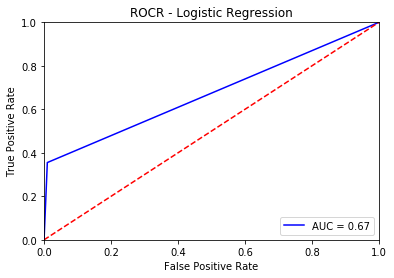

In [47]:
# ROC Chart
fpr, tpr, th= roc_curve(y_test, classes)
roc_auc = metrics.auc(fpr,tpr)
plt.title('ROCR - Logistic Regression')
plt.plot(fpr,tpr, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();


   Confusion Matrix - Logistic Regression


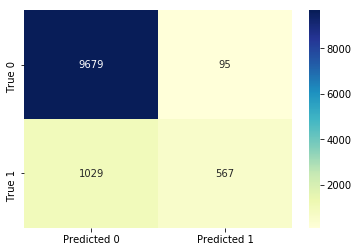

In [48]:
print()
print ('   Confusion Matrix - Logistic Regression')
cf =  metrics.confusion_matrix(y_test,classes)
lbl1 = ["Predicted 0","Predicted 1"]
lbl2 = ["True 0","True 1"]
sns.heatmap(cf, annot=True, fmt="d", xticklabels=lbl1, yticklabels=lbl2, cmap="YlGnBu")
plt.show();

In [49]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)

# fit the model

random_forest.fit(X_train, y_train)
classes = random_forest.predict(X_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [50]:
print(classes.size)
print('Positive Cases in Test Data:', y_test[y_test == 1].shape[0])
print('Negative Cases in Test Data:', y_test[y_test == 0].shape[0])

11370
Positive Cases in Test Data: 1596
Negative Cases in Test Data: 9774


In [51]:
print('Accuracy Score - Random Forest')
print(metrics.accuracy_score(y_test, classes))
print()
print('Precision/Recall Metrics')
print(metrics.classification_report(y_test,classes))
print()
auc_rf = metrics.roc_auc_score(y_test,classes)
print('AUC')
print(auc_rf)

rf_accuracy = accuracy_score(y_test, classes)
rf_precision = precision_score(y_test,classes)
rf_recall = recall_score(y_test,classes)

Accuracy Score - Random Forest
0.998680738786

Precision/Recall Metrics
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      9774
          1       1.00      0.99      1.00      1596

avg / total       1.00      1.00      1.00     11370


AUC
0.99530075188


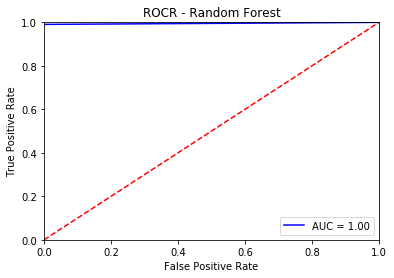

In [52]:
# ROC Chart
fpr, tpr, th= roc_curve(y_test, classes)
roc_auc = metrics.auc(fpr,tpr)
plt.title('ROCR - Random Forest')
plt.plot(fpr,tpr, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();


     Confusion Matrix - Random Forest


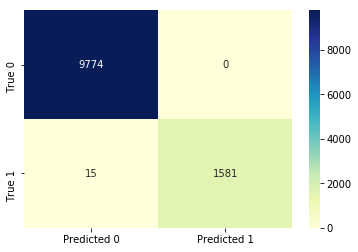

In [53]:
print()
print ('     Confusion Matrix - Random Forest')
cf =  metrics.confusion_matrix(y_test,classes)
lbl1 = ["Predicted 0","Predicted 1"]
lbl2 = ["True 0","True 1"]
sns.heatmap(cf, annot=True, fmt="d", xticklabels=lbl1, yticklabels=lbl2, cmap="YlGnBu")
plt.show();

In [54]:
# Support Vector Machines

svc = SVC()

# fit the model

svc.fit(X_train, y_train)
classes = svc.predict(X_test)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [55]:
print(classes.size)
print('Positive Cases in Test Data:', y_test[y_test == 1].shape[0])
print('Negative Cases in Test Data:', y_test[y_test == 0].shape[0])

11370
Positive Cases in Test Data: 1596
Negative Cases in Test Data: 9774


In [56]:
print('Accuracy Score - SVC')
print(metrics.accuracy_score(y_test, classes))
print()
print('Precision/Recall Metrics')
print(metrics.classification_report(y_test,classes))
print()
auc_svc = metrics.roc_auc_score(y_test,classes)
print('AUC')
print(auc_svc)

svc_accuracy = accuracy_score(y_test, classes)
svc_precision = precision_score(y_test,classes)
svc_recall = recall_score(y_test,classes)

Accuracy Score - SVC
0.889621811785

Precision/Recall Metrics
             precision    recall  f1-score   support

          0       0.89      1.00      0.94      9774
          1       0.89      0.24      0.38      1596

avg / total       0.89      0.89      0.86     11370


AUC
0.619411673752


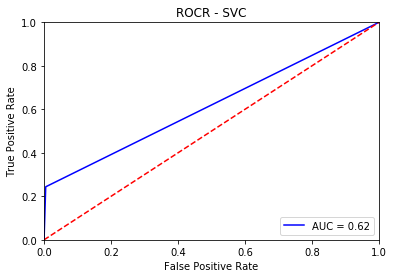

In [57]:
# ROC Chart
fpr, tpr, th= roc_curve(y_test, classes)
roc_auc = metrics.auc(fpr,tpr)
plt.title('ROCR - SVC')
plt.plot(fpr,tpr, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();


      Confusion Matrix - SVC


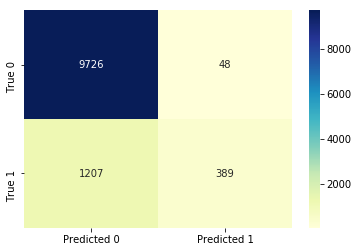

In [58]:
print()
print ('      Confusion Matrix - SVC')
cf =  metrics.confusion_matrix(y_test,classes)
lbl1 = ["Predicted 0","Predicted 1"]
lbl2 = ["True 0","True 1"]
sns.heatmap(cf, annot=True, fmt="d", xticklabels=lbl1, yticklabels=lbl2, cmap="YlGnBu")
plt.show();

In [59]:
# K-NN

knn = KNeighborsClassifier(n_neighbors = 3)

# fit the model

knn.fit(X_train, y_train)
classes = knn.predict(X_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [60]:
print(classes.size)
print('Positive Cases in Test Data:', y_test[y_test == 1].shape[0])
print('Negative Cases in Test Data:', y_test[y_test == 0].shape[0])

11370
Positive Cases in Test Data: 1596
Negative Cases in Test Data: 9774


In [61]:
print('Accuracy Score - KNN')
print(metrics.accuracy_score(y_test, classes))
print()
print('Precision/Recall Metrics')
print(metrics.classification_report(y_test,classes))
print()
auc_knn = metrics.roc_auc_score(y_test,classes)
print('AUC')
print(auc_knn)

knn_accuracy = accuracy_score(y_test, classes)
knn_precision = precision_score(y_test,classes)
knn_recall = recall_score(y_test,classes)

Accuracy Score - KNN
0.8890941073

Precision/Recall Metrics
             precision    recall  f1-score   support

          0       0.91      0.96      0.94      9774
          1       0.66      0.42      0.52      1596

avg / total       0.88      0.89      0.88     11370


AUC
0.694859462961


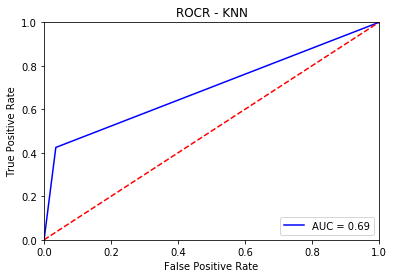

In [62]:
# ROC Chart
fpr, tpr, th= roc_curve(y_test, classes)
roc_auc = metrics.auc(fpr,tpr)
plt.title('ROCR - KNN')
plt.plot(fpr,tpr, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

      Confusion Matrix - KNN


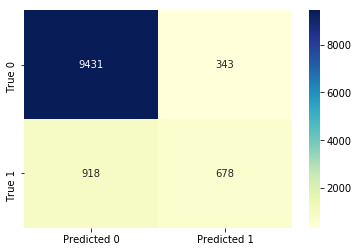

In [63]:
print ('      Confusion Matrix - KNN')
cf =  metrics.confusion_matrix(y_test,classes)
lbl1 = ["Predicted 0","Predicted 1"]
lbl2 = ["True 0","True 1"]
sns.heatmap(cf, annot=True, fmt="d", xticklabels=lbl1, yticklabels=lbl2, cmap="YlGnBu")
plt.show();

In [64]:
# Gaussian Naive Bayes

gnb = GaussianNB()

# fit the model

gnb.fit(X_train, y_train)
classes = gnb.predict(X_test)

GaussianNB(priors=None)

In [65]:
print(classes.size)
print('Positive Cases in Test Data:', y_test[y_test == 1].shape[0])
print('Negative Cases in Test Data:', y_test[y_test == 0].shape[0])

11370
Positive Cases in Test Data: 1596
Negative Cases in Test Data: 9774


In [66]:
print('Accuracy Score - Gaussian Naive Bayes')
print(metrics.accuracy_score(y_test, classes))
print()
print('Precision/Recall Metrics')
print(metrics.classification_report(y_test,classes))
print()
auc_gnb = metrics.roc_auc_score(y_test,classes)
print('AUC')
print(auc_gnb)

gnb_accuracy = accuracy_score(y_test, classes)
gnb_precision = precision_score(y_test,classes)
gnb_recall = recall_score(y_test,classes)

Accuracy Score - Gaussian Naive Bayes
0.979331574318

Precision/Recall Metrics
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      9774
          1       0.97      0.88      0.92      1596

avg / total       0.98      0.98      0.98     11370


AUC
0.937649910534


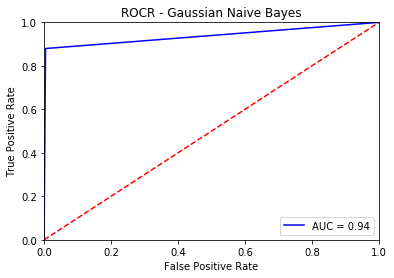

In [67]:
# ROC Chart
fpr, tpr, th= roc_curve(y_test, classes)
roc_auc = metrics.auc(fpr,tpr)
plt.title('ROCR - Gaussian Naive Bayes')
plt.plot(fpr,tpr, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

   Confusion Matrix - Gaussian Naive Bayes


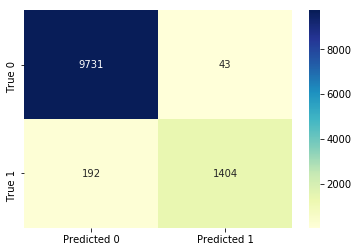

In [68]:
print ('   Confusion Matrix - Gaussian Naive Bayes')
cf =  metrics.confusion_matrix(y_test,classes)
lbl1 = ["Predicted 0","Predicted 1"]
lbl2 = ["True 0","True 1"]
sns.heatmap(cf, annot=True, fmt="d", xticklabels=lbl1, yticklabels=lbl2, cmap="YlGnBu")
plt.show();

In [69]:
# Linear SVC

linear_svc = LinearSVC()

# fit the model

linear_svc.fit(X_train, y_train)
classes = linear_svc.predict(X_test)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [70]:
print(classes.size)
print('Positive Cases in Test Data:', y_test[y_test == 1].shape[0])
print('Negative Cases in Test Data:', y_test[y_test == 0].shape[0])

11370
Positive Cases in Test Data: 1596
Negative Cases in Test Data: 9774


In [71]:
print('Accuracy Score - Linear SVC')
print(metrics.accuracy_score(y_test, classes))
print()
print('Precision/Recall Metrics')
print(metrics.classification_report(y_test,classes))
print()
auc_lsvc = metrics.roc_auc_score(y_test,classes)
print('AUC')
print(auc_lsvc)

lsvc_accuracy = accuracy_score(y_test, classes)
lsvc_precision = precision_score(y_test,classes)
lsvc_recall = recall_score(y_test,classes)

Accuracy Score - Linear SVC
0.920316622691

Precision/Recall Metrics
             precision    recall  f1-score   support

          0       0.92      0.99      0.96      9774
          1       0.91      0.48      0.63      1596

avg / total       0.92      0.92      0.91     11370


AUC
0.735562817418


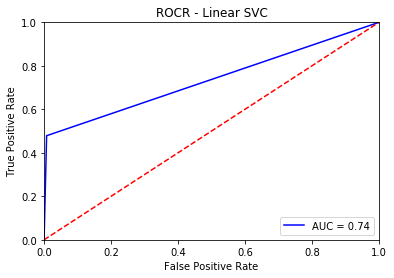

In [72]:
# ROC Chart
fpr, tpr, th= roc_curve(y_test, classes)
roc_auc = metrics.auc(fpr,tpr)
plt.title('ROCR - Linear SVC')
plt.plot(fpr,tpr, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

     Confusion Matrix - Linear SVC


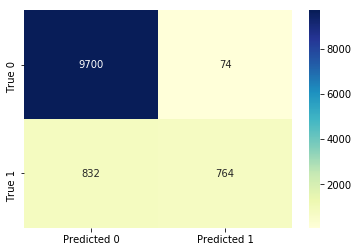

In [73]:
print ('     Confusion Matrix - Linear SVC')
cf =  metrics.confusion_matrix(y_test,classes)
lbl1 = ["Predicted 0","Predicted 1"]
lbl2 = ["True 0","True 1"]
sns.heatmap(cf, annot=True, fmt="d", xticklabels=lbl1, yticklabels=lbl2, cmap="YlGnBu")
plt.show();

In [74]:
# Decision Tree

dtree = DecisionTreeClassifier()

# fit the model

dtree.fit(X_train, y_train)
classes = dtree.predict(X_test)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [75]:
print(classes.size)
print('Positive Cases in Test Data:', y_test[y_test == 1].shape[0])
print('Negative Cases in Test Data:', y_test[y_test == 0].shape[0])

11370
Positive Cases in Test Data: 1596
Negative Cases in Test Data: 9774


In [76]:
print('Accuracy Score - Decision Tree')
print(metrics.accuracy_score(y_test, classes))
print()
print('Precision/Recall Metrics')
print(metrics.classification_report(y_test,classes))
print()
auc_dtree = metrics.roc_auc_score(y_test,classes)
print('AUC')
print(auc_dtree)

dtree_accuracy = accuracy_score(y_test, classes)
dtree_precision = precision_score(y_test,classes)
dtree_recall = recall_score(y_test,classes)

Accuracy Score - Decision Tree
0.997625329815

Precision/Recall Metrics
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      9774
          1       0.99      0.99      0.99      1596

avg / total       1.00      1.00      1.00     11370


AUC
0.994949005417


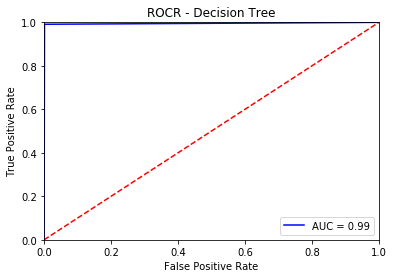

In [77]:
# ROC Chart
fpr, tpr, th= roc_curve(y_test, classes)
roc_auc = metrics.auc(fpr,tpr)
plt.title('ROCR - Decision Tree')
plt.plot(fpr,tpr, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

     Confusion Matrix - Decision Tree


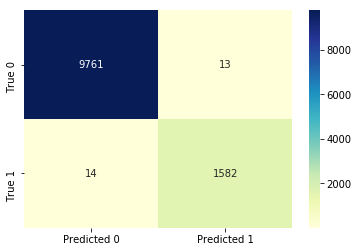

In [78]:
print ('     Confusion Matrix - Decision Tree')
cf =  metrics.confusion_matrix(y_test,classes)
lbl1 = ["Predicted 0","Predicted 1"]
lbl2 = ["True 0","True 1"]
sns.heatmap(cf, annot=True, fmt="d", xticklabels=lbl1, yticklabels=lbl2, cmap="YlGnBu")
plt.show();

In [79]:
# import libraries for Deep Learning

from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, LSTM, Dropout, advanced_activations
from keras.callbacks import ModelCheckpoint, TensorBoard
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, average_precision_score, recall_score
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
get_ipython().magic('matplotlib inline')
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [80]:
# Dataset for Deep Learning Model

df_dl = df_final

In [81]:
# Separating the dependent and independent variables

X = df_dl.iloc[:, 1:]
y = df_dl.iloc[:, 0]

In [82]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
arr_scaler_X = scaler.fit_transform(X)

In [83]:
# Splitting the dataset into the Training set and Test set

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(arr_scaler_X, y, test_size = 0.3, random_state = 0)

In [84]:
model = Sequential()
model.add(Dense(512, input_dim=9))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [85]:
X_train = np.array(X_train)
y_train = np.array(y_train)

# Fit the model
model.fit(X_train,y_train, epochs=100, batch_size=64)

Epoch 1/100
26530/26530 [==============================] - 6s - loss: 0.2573 - acc: 0.9001     
Epoch 2/100
26530/26530 [==============================] - 5s - loss: 0.1718 - acc: 0.9377     
Epoch 3/100
26530/26530 [==============================] - 5s - loss: 0.1571 - acc: 0.9434     
Epoch 4/100
26530/26530 [==============================] - 5s - loss: 0.1378 - acc: 0.9493     
Epoch 5/100
26530/26530 [==============================] - 5s - loss: 0.1316 - acc: 0.9512     
Epoch 6/100
26530/26530 [==============================] - 5s - loss: 0.1270 - acc: 0.9536     
Epoch 7/100
26530/26530 [==============================] - 5s - loss: 0.1197 - acc: 0.9559     
Epoch 8/100
26530/26530 [==============================] - 5s - loss: 0.1183 - acc: 0.9553     
Epoch 9/100
26530/26530 [==============================] - 5s - loss: 0.1136 - acc: 0.9583     
Epoch 10/100
26530/26530 [==============================] - 5s - loss: 0.1149 - acc: 0.9578     
Epoch 11/100
26530/26530 [=============

26530/26530 [==============================] - 5s - loss: 0.0526 - acc: 0.9812     
Epoch 86/100
26530/26530 [==============================] - 5s - loss: 0.0525 - acc: 0.9818     
Epoch 87/100
26530/26530 [==============================] - 5s - loss: 0.0530 - acc: 0.9818     
Epoch 88/100
26530/26530 [==============================] - 5s - loss: 0.0527 - acc: 0.9816     
Epoch 89/100
26530/26530 [==============================] - 5s - loss: 0.0536 - acc: 0.9812     
Epoch 90/100
26530/26530 [==============================] - 5s - loss: 0.0536 - acc: 0.9821     
Epoch 91/100
26530/26530 [==============================] - 5s - loss: 0.0522 - acc: 0.9812     
Epoch 92/100
26530/26530 [==============================] - 5s - loss: 0.0508 - acc: 0.9819     
Epoch 93/100
26530/26530 [==============================] - 5s - loss: 0.0506 - acc: 0.9824     
Epoch 94/100
26530/26530 [==============================] - 5s - loss: 0.0496 - acc: 0.9826     
Epoch 95/100
26530/26530 [=================

In [86]:
classes = model.predict_classes(X_test, batch_size=32, verbose=0)
print(classes.size)
print('Positive Cases in Test Data:', y_test[y_test == 1].shape[0])
print('Negative Cases in Test Data:', y_test[y_test == 0].shape[0])

11370
Positive Cases in Test Data: 1596
Negative Cases in Test Data: 9774


In [87]:
print('Accuracy Score - Deep Learning')
print(metrics.accuracy_score(y_test, classes))
print()
print('Precision/Recall Metrics')
print(metrics.classification_report(y_test,classes))
print()
auc_dl = metrics.roc_auc_score(y_test,classes)
print('AUC')
print(auc_dl)

dl_accuracy = accuracy_score(y_test, classes)
dl_precision = precision_score(y_test,classes)
dl_recall = recall_score(y_test,classes)

Accuracy Score - Deep Learning
0.985751978892

Precision/Recall Metrics
             precision    recall  f1-score   support

          0       0.99      1.00      0.99      9774
          1       0.97      0.93      0.95      1596

avg / total       0.99      0.99      0.99     11370


AUC
0.961043838879


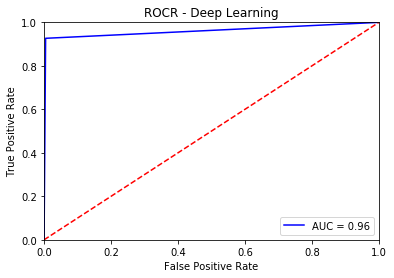

In [88]:
# ROC Chart
fpr, tpr, th= roc_curve(y_test, classes)
roc_auc = metrics.auc(fpr,tpr)
plt.title('ROCR - Deep Learning')
plt.plot(fpr,tpr, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

     Confusion Matrix - Deep Learning


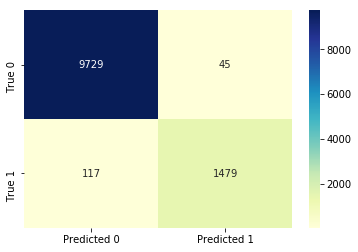

In [89]:
print ('     Confusion Matrix - Deep Learning')
cf =  metrics.confusion_matrix(y_test,classes)
lbl1 = ["Predicted 0","Predicted 1"]
lbl2 = ["True 0","True 1"]
sns.heatmap(cf, annot=True, fmt="d", xticklabels=lbl1, yticklabels=lbl2, cmap="YlGnBu")
plt.show();

In [91]:
# Model Comparision

models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Deep Learning', 'Support Vector Machines', 'KNN', 'Naive Bayes', 'Linear SVC', 'Decision Tree'],
    'Score_Accuracy': [lrn_accuracy, rf_accuracy, dl_accuracy, svc_accuracy, knn_accuracy, gnb_accuracy, lsvc_accuracy, dtree_accuracy],
    'Precision_Score': [lrn_precision, rf_precision, dl_precision, svc_precision, knn_precision, gnb_precision, lsvc_precision, dtree_precision],
    'Recall_Score': [lrn_recall, rf_recall, dl_recall, svc_recall, knn_recall, gnb_recall, lsvc_recall, dtree_recall],
    'Value_AUC': [auc_lrn, auc_rf, auc_dl, auc_svc, auc_knn, auc_gnb, auc_lsvc, auc_dtree]})
models = models.round(3)
models.sort_values('Precision_Score', ascending=False)

,Model,Precision_Score,Recall_Score,Score_Accuracy,Value_AUC
1,Random Forest,1.000,0.991,0.999,0.995
7,Decision Tree,0.992,0.991,0.998,0.995
2,Deep Learning,0.970,0.927,0.986,0.961
5,Naive Bayes,0.970,0.880,0.979,0.938
6,Linear SVC,0.912,0.479,0.920,0.736
3,Support Vector Machines,0.890,0.244,0.890,0.619
0,Logistic Regression,0.856,0.355,0.901,0.673
4,KNN,0.664,0.425,0.889,0.695
